**Penguins Analysis**

** **

**Importing the neccessary libraries**

In [1]:
import pickle
import pandas as pd
import numpy as np
import scipy.stats as stats
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score

** **

** **

**Section 1: Data Analysis and Statistical Skills**

**1: Data Preparation**

**1.1 : Importing Data**

In [2]:

def wrangle(path):
    # Importing Dataset
    df = pd.read_csv(path)
       
    # Dropping unncessary columns
    df.drop(columns=["flipper_length_mm", "year","rowid"], inplace=True)
    df.dropna(inplace=True)
    
    return df

In [3]:

df = wrangle("penguins.csv")
print("The shape of the Dataframe is", df.shape)
df.info()
df.head()

The shape of the Dataframe is (333, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         333 non-null    object 
 1   island          333 non-null    object 
 2   bill_length_mm  333 non-null    float64
 3   bill_depth_mm   333 non-null    float64
 4   body_mass_g     333 non-null    float64
 5   sex             333 non-null    object 
dtypes: float64(3), object(3)
memory usage: 18.2+ KB


,species,island,bill_length_mm,bill_depth_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,3750.0,male
1,Adelie,Torgersen,39.5,17.4,3800.0,female
2,Adelie,Torgersen,40.3,18.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,3450.0,female
5,Adelie,Torgersen,39.3,20.6,3650.0,male


** **

**1.2: Exploratory Data Analysis**

In [4]:
df.select_dtypes(include='object').nunique()

species    3
island     3
sex        2
dtype: int64

In [5]:
df.select_dtypes(include='float').describe()

,bill_length_mm,bill_depth_mm,body_mass_g
count,333.000000,333.000000,333.000000
mean,43.992793,17.164865,4207.057057
std,5.468668,1.969235,805.215802
min,32.100000,13.100000,2700.000000
25%,39.500000,15.600000,3550.000000
50%,44.500000,17.300000,4050.000000
75%,48.600000,18.700000,4775.000000
max,59.600000,21.500000,6300.000000


In [6]:
df["island"].value_counts(normalize=True)*100

Biscoe       48.948949
Dream        36.936937
Torgersen    14.114114
Name: island, dtype: float64

In [7]:
def horizontal_chart_island():
    # Calculate value counts
    island_counts = df["island"].value_counts(normalize = True)*100

    # Create a horizontal bar chart using Plotly
    fig = go.Figure(
        go.Bar(
            y=island_counts.index, 
            x=island_counts.values,
            orientation='h',
            marker_color='blue')
        )
    fig.update_layout(
        title='Horizontal Bar Chart for Island',
        xaxis_title='Frequency',
        yaxis_title='Island'
    )

    return fig

In [8]:
horizontal_chart_island()

The majority of the penguins are found in Biscoe (48%), followed by Dream (37%) and Torgersen (14%)

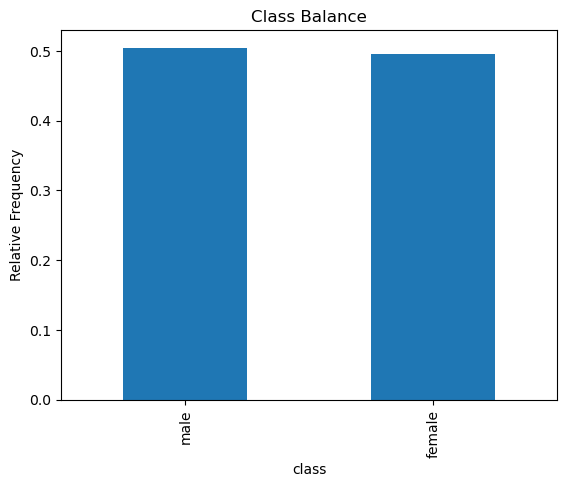

In [9]:
df["sex"].value_counts(normalize = True).plot(
        kind="bar", xlabel="class", ylabel="Relative Frequency", title="Class Balance"
    );

Basing on the above diagram, our dependent variable to be considered in the model development is balanced

In [9]:
def doughnut_chart_species():
    # Data
    species_count = df["species"].value_counts(normalize=True).reset_index()
    species_count.columns = ["species", "Percentage"]

    # Create a donut chart using Plotly Express
    fig = px.pie(
        species_count,
        values="Percentage",
        names="species",
        color_discrete_sequence=['red', 'green', 'gold'],
        hole=0.5,
        title="Doughnut showing the distribution of  species"
    )

    # Update layout for a better appearance
    fig.update_traces(textinfo="percent+label", pull=[0, 0.1, 0], textposition="inside")

    return fig

In [10]:
doughnut_chart_species()

** **

**1.3: ANOVA for test of difference in mean**

Subsetting male and females and getting their weight

In [11]:
penguin_sex = []
for sex in df["sex"].unique():
    mask_sex = (df["sex"] == sex)
    df_sex = df[mask_sex]
    sex_mass_g = df_sex["body_mass_g"]
    penguin_sex.append(sex_mass_g)
    
male_mass = penguin_sex[0]
female_mass = penguin_sex[1]

ANOVA for the weight of penguins by sex

In [13]:
# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(male_mass, female_mass)

# Print the ANOVA results
print("p-value:", round(p_value, 2))

# Check for significance
alpha = 0.05
if p_value < alpha:
    
    # The alternative hypothesis
    print("There is a significant difference between the weights of both the male and female penguins.")
else:
    
    # The null hypothesis
    print("There is no significant difference between the weights of both the male and female penguins.")


p-value: 0.0
There is a significant difference between the weights of both the male and female penguins.


Since the p-value is less than 0.05, it implies that there is a significant difference in the weight of both the male and female penguins

*It is well illustrated above*

** **

Subsetting basing on species

In [12]:
group_species_by_mass = []

for species in df["species"].unique():
    mask_species = (df["species"] == species)
    df_species = df[mask_species]
    df_species_mass = df_species["body_mass_g"]
    group_species_by_mass.append(df_species_mass)
    
Adelie_mass = group_species_by_mass[0]
Gentoo_mass = group_species_by_mass[1]
Chinstrap_mass = group_species_by_mass[2]


In [15]:
# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(Adelie_mass, Gentoo_mass, Chinstrap_mass)

# Print the ANOVA results
print("p-value:", round(p_value, 2))

# Check for significance
alpha = 0.05
if p_value < alpha:
    
    # The alternative hypothesis
    print("There is a significant difference between the weights in all the three species.")
else:
    
    # The null hypothesis
    print("There is no significant difference between the weights in all the three species.")


p-value: 0.0
There is a significant difference between the weights in all the three species.


Since the p-value is less than 0.05, it implies that there is a significant difference in the weight of all the three species

*It is well illustrated above*

** **

**1.4 Calculation of correlation coefficients for the attributes in the Penguins dataset**

In [16]:
df.select_dtypes(include="float").corr()

,bill_length_mm,bill_depth_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.589451
bill_depth_mm,-0.228626,1.000000,-0.472016
body_mass_g,0.589451,-0.472016,1.000000


Basing on the above table and the heatmap below:


There is a negative and low reletionship between bill_length_mm and bill_depth_mm

There is a positive and moderate reletionship between bill_length_mm and body_mass_g

There is a negative and moderate reletionship between bill_depth_mm and body_mass_g


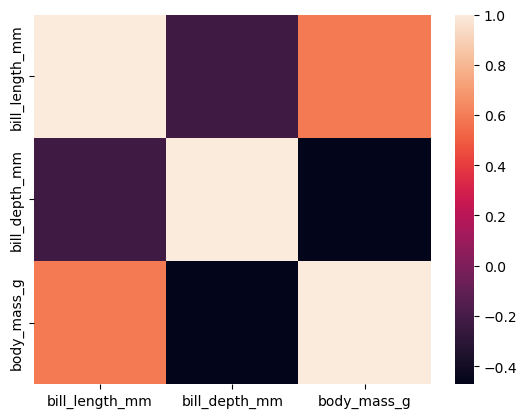

In [17]:
sns.heatmap(df.select_dtypes(include="float").corr());

Our indedependent variables are suitable for model development since they are in dependent

** **

** **

**Section 2: Data Science Skills**

2.1: Splitting the Dataset

*Vertical splitting*

In [13]:
target = "sex"
X = df.drop(columns=target)
y = df[target]

*Horizontal splitting*

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=42
)

2.2: Baseline Indicator

In [15]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline:", round(acc_baseline, 2))

Baseline: 0.52


**2.3: Logistic Regression model**

In [16]:
# Build model
model_lr = make_pipeline(

    OneHotEncoder(use_cat_names = True),
    LogisticRegression(max_iter = 10000)
)
# Fit model to training data
model_lr.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['species', 'island'], use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=10000))])

Model Evaluation

In [17]:
acc_train_lr = accuracy_score(y_train, model_lr.predict(X_train))
acc_test_lr = model_lr.score(X_test, y_test)

print("Training Accuracy:", round(acc_train_lr, 2))
print("Test Accuracy:", round(acc_test_lr, 2))

Training Accuracy: 0.92
Test Accuracy: 0.88


In [18]:
y_pred_lr = model_lr.predict(X_test)
f1_score_value_lr = f1_score(y_test, y_pred_lr, pos_label='female')
round(f1_score_value_lr, 4)

0.8857

In [19]:
# Saving the model`
with open("logistic_regression.pkl", "wb") as f:
    pickle.dump(model_lr, f)

Communication of Findings

In [20]:
y_pred_test = pd.Series(model_lr.predict(X_test))
y_pred_test.head()

0    female
1    female
2      male
3    female
4      male
dtype: object

**For prediction of a new penguin dataset**

In [21]:
X_new = wrangle("penguins.csv").drop(columns='sex')
y_pred_new = pd.Series(model_lr.predict(X_new))
y_pred_new.head()

0      male
1    female
2    female
3    female
4      male
dtype: object

**2.4: Decision tree classifier**

In [22]:
# Build Model
model_decision_tree = make_pipeline(
    OneHotEncoder(), 
    DecisionTreeClassifier(random_state=42, max_depth=5)
)
# Fit model to training data
model_decision_tree.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=['species', 'island'])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

Model evaluation

In [23]:
acc_train = accuracy_score(y_train, model_decision_tree.predict(X_train))
acc_test = model_decision_tree.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.96
Test Accuracy: 0.87


In [29]:
y_pred_dt = model_decision_tree.predict(X_test)
f1_score_value_dt = f1_score(y_test, y_pred_dt, pos_label='female')
round(f1_score_value_dt, 4)

0.8696

In [30]:
# Saving the model`
with open("decision_tree.pkl", "wb") as f:
    pickle.dump(model_decision_tree, f)

Communication of Findings

In [31]:
y_pred_test = pd.Series(model_decision_tree.predict(X_test))
y_pred_test.head()

0    female
1    female
2      male
3    female
4      male
dtype: object

**For prediction of a new penguin dataset**

In [32]:
X_new = wrangle("penguins.csv").drop(columns='sex')
y_pred_new = pd.Series(model_decision_tree.predict(X_new))
y_pred_new.head()

0      male
1      male
2    female
3    female
4      male
dtype: object

Basing on both the accuracy score and f1 score of both the logistic regression model and the decission tree classifier model, the logistic regression model performs better than the decision tree classifier dince both the test score and f1 score beats the one for decision tree classifier.

For proper decision making, as a data scientist I would advice that decision should be made using logistic regression mode

** **

**Thank you for reviewing my work**

MODEL DEPLOYMENT

In [24]:
from dash import Dash, dcc, html, Input, Output
import dash.exceptions

In [25]:
app = Dash(__name__)

In [40]:
X_train.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'body_mass_g'], dtype='object')

In [61]:
X_train["island"].unique()

array(['Biscoe', 'Dream', 'Torgersen'], dtype=object)

In [31]:
app.layout = html.Div([
    html.H1("PENGUINS  ANALYSIS"),
    dcc.Graph(
        id='doughnut_chart_species',
        figure=doughnut_chart_species()
    ),
    dcc.Graph(
        id='horizontal_chart_island',
        figure=horizontal_chart_island()
    ),
    html.H1("PENGUINS SEX PREDICTOR"),
    html.Div([
        html.Label("Species:"),
        dcc.Dropdown(
            id="species",
            options=[
                {"label": "Gentoo", "value": "Gentoo"},
                {"label": "Adelie", "value": "Adelie"},
                {"label": "Chinstrap", "value": "Chinstrap"},
            ],
            multi=False, 
            value="Gentoo",
            style={'width': "40%"}
        ),
        ], style={'margin-bottom': '10px', 'color': 'green'}),
    html.Div([
        html.Label("Island:"),
        dcc.Dropdown(
            id="island",
            options=[
                {"label": "Biscoe", "value": "Biscoe"},
                {"label": "Dream", "value": "Dream"},
                {"label": "Torgersen", "value": "Torgersen"},
            ],
            multi=False,
            value="Biscoe",
            style={'width': "40%"} 
        ),
    ], style={'margin-bottom': '10px'}),
    html.Div([
        html.Label("Bill length in mm:"),
        dcc.Input(id="bill_length_mm", type="text", value=0.0),
    ], style={'margin-bottom': '10px'}),
    html.Div([
        html.Label("Bill Depth mm"),
        dcc.Input(id="bill_depth_mm", type="text", value=0.0),
    ], style={'margin-bottom': '10px'}),
    html.Div([
        html.Label("Body Mass in grams"),
        dcc.Input(id="body_mass_g", type="text", value=0.0),
    ], style={'margin-bottom': '10px'}),
    html.Div([
        html.Button("Predict", id="predict-button"),
    ], style={'margin-bottom': '10px'}),
    html.Div(id="penguins-sex-prediction")    
], style={'background-color': 'whitesmoke', 'padding': '1em'})

In [27]:
# Create the prediction function
def predict_with_input(user_input):
    # Load the trained model
    with open("logistic_regression.pkl", "rb") as f:
        model = pickle.load(f)
    prediction = model.predict(user_input)
    return prediction[0]

In [28]:
@app.callback(
    Output("penguins-sex-prediction", "children"),
    Input("predict-button", "n_clicks"),
    [
        Input("species", "value"),
        Input("island", "value"),
        Input("bill_length_mm", "value"),
        Input("bill_depth_mm", "value"),
        Input("body_mass_g", "value"),
    ],
)
def update_prediction(n_clicks, species, island, bill_length_mm, bill_depth_mm, body_mass_g):
    if n_clicks is None:
        return ""

    # Preprocess input (convert to DataFrame)
    user_input = pd.DataFrame({
        "species": [species],
        "island": [island],
        "bill_length_mm": [bill_length_mm],
        "bill_depth_mm": [bill_depth_mm],
        "body_mass_g": [body_mass_g]
    })

    try:
        trigger_id = dash.callback_context.triggered[0]["prop_id"]
        if trigger_id == "predict-button.n_clicks":
            prediction = predict_with_input(user_input)
            return f"Predicted Sex: {prediction}"
    except dash.exceptions.CallbackException:
        pass

    return ""

In [32]:
if __name__ == '__main__':
    app.run_server(debug=True)